In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [2]:
from skimage import data

In [5]:
import sys
from PIL import Image

In [10]:
# BONUS SHAKIRA


from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort

def princomp(A, numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

A = imread('../Images/AsianArtResearch/Hanuman.jpg') # load an image
A = mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []


trying 0 principal components with a distance of: 20676.934581
trying 10 principal components with a distance of: 11080.593441
trying 20 principal components with a distance of: 9177.913069
trying 30 principal components with a distance of: 7975.106921
trying 40 principal components with a distance of: 7083.769297


ValueError: num must be 1 <= num <= 6, not 7

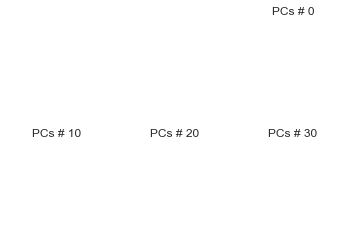

In [13]:
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    print "trying %s principal components with a distance of: %f"%(numpc,dist[-1])
    if numpc <= 50:
        if numpc == 50:
            imsave(fname= '../data/'+str(numpc)+'.png', arr = Ar)
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1
        #imshow(Ar)
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(A)
title('numpc FULL')
gray()
show()